In [1]:
# Extract from https://github.com/StanfordVL/behavior/blob/main/behavior/benchmark/behavior_benchmark.py
import os
import numpy as np

from PIL import Image
from igibson.utils.utils import parse_config

from igibson import object_states
from igibson.utils.utils import restoreState

from igibson.action_primitives.behavior_robot_semantic_actions_env import BehaviorRobotSemanticActionEnv
from igibson.custom_utils import get_env_config, print_properties
from igibson.primitives_utils import get_names_of_visible_obj_inside, get_objects_inside, settle_physics 
import igibson.render_utils as render_utils

import warnings
warnings.filterwarnings("ignore")


 _   _____  _  _
(_) / ____|(_)| |
 _ | |  __  _ | |__   ___   ___   _ __
| || | |_ || || '_ \ / __| / _ \ | '_ \
| || |__| || || |_) |\__ \| (_) || | | |
|_| \_____||_||_.__/ |___/ \___/ |_| |_|



/miniconda/envs/igibson/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Env config
task = "cleaning_out_drawers"
scene_id =  "Benevolence_1_int"

# Init env
env = BehaviorRobotSemanticActionEnv(task, scene_id, verbose=True)

Rendering settings is None - going with the default settings!
																																																																						b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
left_hand_shoulderb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
right_hand_shoulderb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
neckb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [4]:
# Pick which object to navigate to
# 'sink.n.01_1' (nothing inside)
# 'cabinet.n.01_1' (contains 'bowl.n.01_1', 'bowl.n.01_2', 'piece_of_cloth.n.01_1' )
# 'cabinet.n.01_2' (contains 'spoon.n.01_1' and 'spoon.n.01_2')
# See all list with 
# print(env.task.object_scope)

plan = [
    {'action':'go_to', 'params':{'obj_name':'cabinet.n.01_1'}},
    {'action':'open', 'params':{'obj_name':'cabinet.n.01_1'}}, # TODO: add better prompts for the outer loop + it's failing too often
    {'action':'grasp', 'params':{'obj_name':'bowl.n.01_1'}}
       ]

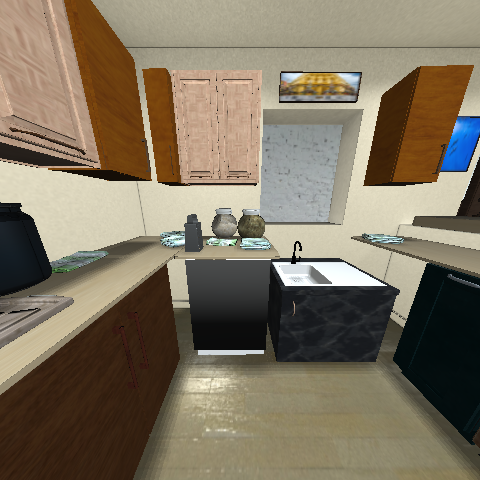

Start collision test.
Left hand has collision with objects %s [25]
End collision test.
Candidate position failed collision test.
Start collision test.
Right hand has collision with objects %s [25]
End collision test.
Candidate position failed collision test.
Candidate position failed robot distance test.
Object not visible.
Start collision test.
Left hand has collision with objects %s [25]
Right hand has collision with objects %s [25]
End collision test.
Candidate position failed collision test.
Object not visible.
Start collision test.
End collision test.
Action {'action': 'go_to', 'params': {'obj_name': 'cabinet.n.01_1'}} executed. Success: True


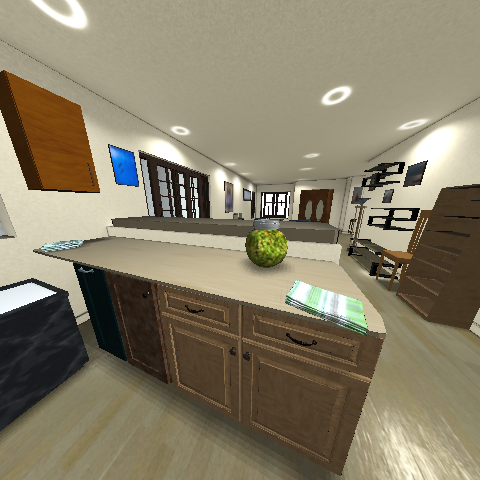

The StarterSemanticActionPrimitive is a work-in-progress and is only provided as an example. It currently only works with BehaviorRobot with its JointControllers set to absolute mode. See provided behavior_robot_mp_behavior_task.yaml config file for an example. See examples/action_primitives for runnable examples.


cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True
cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True
cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True
cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True
cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True
Action {'action': 'open', 'params': {'obj_name': 'cabinet.n.01_1'}} executed. Success: False


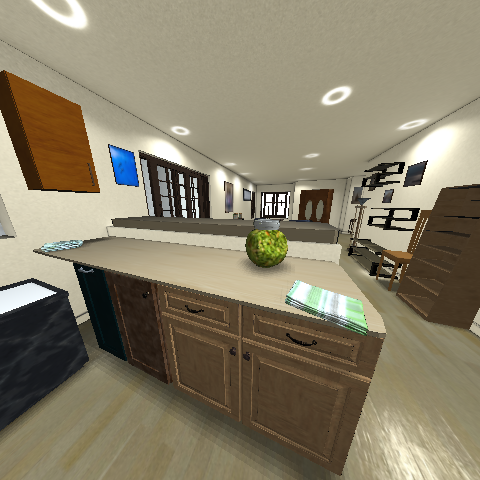

robot_pos: [-0.75973371  0.21447338  0.55      ], quaternion_pose: +0.819 -0.000i +0.000j -0.574k
Target trg_obj_pos: [-0.56359426 -0.03357766  1.2       ]


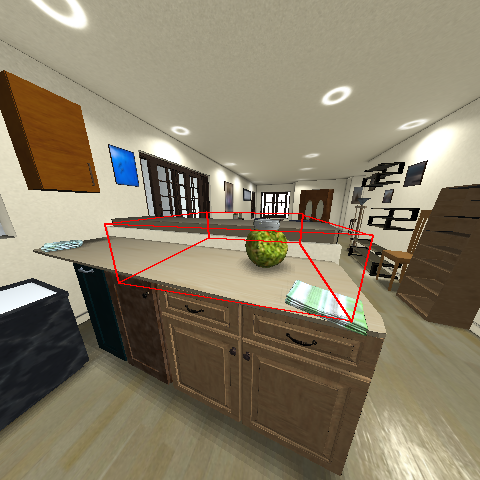

grasp_pose: (array([-0.67770899, -0.04689097,  1.18189982]), array([-0.61219947,  0.54466495, -0.38101404,  0.42822915])) - object_direction: [9.93209826e-01 1.16336756e-01 1.39017833e-06]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/miniconda/envs/igibson/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2632364/3912541871.py", line 8, in <module>
    success, image, symbolic_state = env.apply_action(action)
  File "/scratch/cs/world-models/dainesn1/iGibson/igibson/action_primitives/igibson_semantic_actions_env.py", line 96, in apply_action
    return getattr(self, action['action'])(**action['params'])
  File "/scratch/cs/world-models/dainesn1/iGibson/igibson/action_primitives/igibson_semantic_actions_env.py", line 149, in grasp
  File "/scratch/cs/world-models/dainesn1/iGibson/igibson/action_primitives/behavior_robot_semantic_actions_env.py", line 54, in _move_gripper_to_pose
    robot._parts["right_hand"].set_position_orientation(pose[0], pose[1]) # no idea how else to do that
NameError: name 'robot' is not defined

During handling of the above exception, an

In [5]:
image, symbolic_state = env.get_state_and_image()

# TODO: Render image and print symbolic_state
image.show()

for action in plan:
    try:
        success, image, symbolic_state = env.apply_action(action)
        print(f'Action {action} executed. Success: {success}')
        # TODO: Render image and print symbolic_state
        image.show()
        
        legal = True
        
    except ValueError as e:
        print(f"Action {action} failed: {e}")
        success = False
        legal = False